<a href="https://colab.research.google.com/github/Filquichante/Machine-learning-projects/blob/main/03_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ca va barder, on va faire de la vision hehe

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 15.3 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor, ToPILImage

import matplotlib.pyplot as plt
import PIL as pil

On ajoute le dataset : c'est le FashionMNIST

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10479981.94it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 175297.70it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3143113.77it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20067171.93it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
image, label = test_data[0]

In [ ]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
class_names = test_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = test_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

(-0.5, 27.5, 27.5, -0.5)

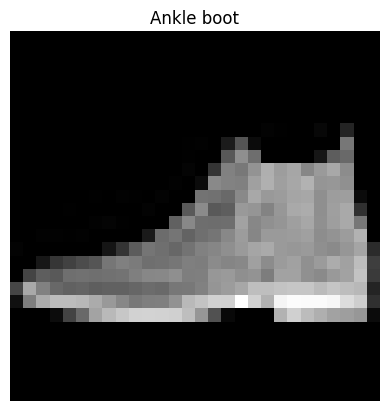

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

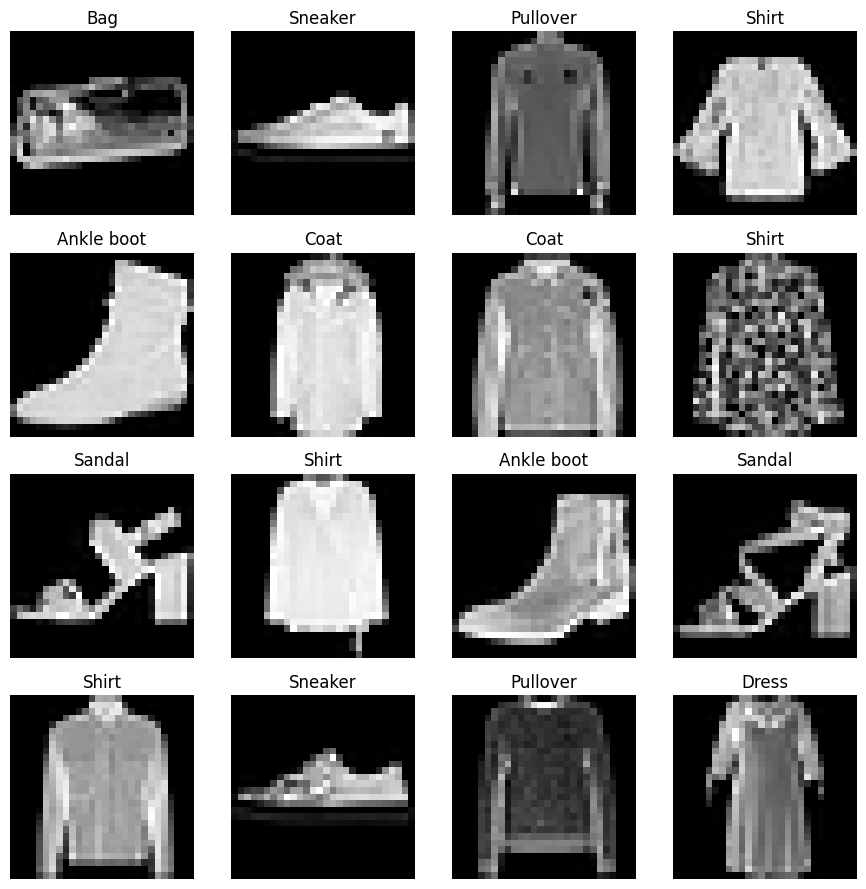

In [ ]:
torch.manual_seed(12)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(0,rows):
  for j in range(0,cols):
    random_idx = torch.randint(low=0, high=len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    plt.subplot(rows, cols, 4*i+j+1)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
plt.tight_layout()
plt.show()

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Juste je m'amuse avec torch.var(), mais c'est un peu compliqué donc flemme

In [ ]:

# Création d'un tenseur d'exemple
x = torch.tensor([
    [[1.0, 2.0, 3.0],
     [4.0, 5.0, 6.0]],
    [[7.0, 8.0, 9.0],
     [10.0, 11.0, 12.0]]
])

# Calcul de la variance le long des dimensions 2 et 3
variance = torch.var(x, dim=1, keepdim=True)
print(variance)


tensor([[[4.5000, 4.5000, 4.5000]],

        [[4.5000, 4.5000, 4.5000]]])


# On a fini les datasets : c'est l'heure du modèle !

In [ ]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
x.shape, output.shape
# output : 1, 28, 28 ---> 1, 28*28

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [ ]:
from torch import nn

In [ ]:
class MNISTFashionModelV0(nn.Module):
  def __init__(self, INPUT_SIZE, OUTPUT_SIZE, INTERN_SIZE):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = INPUT_SIZE,
                  out_features = INTERN_SIZE),
        nn.Linear(in_features = INTERN_SIZE,
                  out_features = OUTPUT_SIZE)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = MNISTFashionModelV0(
    INPUT_SIZE = 784, # this equals 28*28
    OUTPUT_SIZE = 10,
    INTERN_SIZE = 10
).to("cpu")

In [ ]:
x_dummy = torch.randn(1,1,28,28)
print(model_0(x_dummy).shape)

torch.Size([1, 10])


In [ ]:
import requests
from pathlib import Path

#Helper functions from Daniel Bourke
if Path("helper_functions.py").is_file():
  print('Le fichier helper_functions.py est déjà téléchargé...')

else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


# My own functions
if Path("myfunctions.py").is_file():
  print('Le fichier myfunctions.py est déjà téléchargé...')

else:
  request = requests.get("https://raw.githubusercontent.com/Filquichante/LearnPyTorch/main/myfunctions.py")
  with open("myfunctions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end:float,
                     device: torch.device = None):
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start = timer()
end = timer()
print_train_time(start, end, "cpu")

Train time on cpu: 0.000 seconds


4.311999998662941e-05

### Training loop

In [ ]:
from tqdm.auto import tqdm #for progress bar

def first_loop():
  torch.manual_seed(42)
  train_time_start_on_cpu = timer()

  epochs = 3

  for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n-------")
    train_loss = 0

    for batch, (X,y) in enumerate(train_dataloader):
      model_0.train()
      y_pred = model_0(X)
      loss = loss_fn(y_pred, y)
      train_loss += loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch%400==0:
        print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} images")

    train_loss /= len(train_dataloader)


    #testing

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
      for X_test, y_test in test_dataloader:
        test_pred = model_0(X_test)
        test_loss += loss_fn(test_pred, y_test)
        test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

      test_loss /= len(test_dataloader)
      test_acc /= len(test_dataloader)

    print(f"train loss : {train_loss:.4f} | Test loss : {test_loss:.4f} | Test accuracy : {test_acc:.3f}")
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                                device = str(next(model_0.parameters()).device))

In [ ]:
first_loop()

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Looked at 0/60000 images
Looked at 12800/60000 images
Looked at 25600/60000 images
Looked at 38400/60000 images
Looked at 51200/60000 images
train loss : 0.5904 | Test loss : 0.5095 | Test accuracy : 82.039
Train time on cpu: 19.796 seconds
Epoch:1
-------
Looked at 0/60000 images
Looked at 12800/60000 images
Looked at 25600/60000 images
Looked at 38400/60000 images
Looked at 51200/60000 images
train loss : 0.4763 | Test loss : 0.4799 | Test accuracy : 83.197
Train time on cpu: 30.401 seconds
Epoch:2
-------
Looked at 0/60000 images
Looked at 12800/60000 images
Looked at 25600/60000 images
Looked at 38400/60000 images
Looked at 51200/60000 images
train loss : 0.4550 | Test loss : 0.4766 | Test accuracy : 83.427
Train time on cpu: 39.356 seconds


In [ ]:
def evaluate(model:torch.nn.Module,
             data:torch.utils.data.dataloader.DataLoader,
             loss_fn:torch.nn.Module,
              accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data:
      y_pred = model(X)

      loss+=loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data)
    acc /= len(data)

    return {"model_loss":loss.item(),
            "model_acc":acc}

In [ ]:
model_0_results = evaluate(model_0,test_dataloader,loss_fn,accuracy_fn)

In [ ]:
print(model_0_results)

{'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}


### Tentative de modèle CNN

In [ ]:
import torch.nn.functional as F

class MNISTFashionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 2, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(2, 4, 5)
    self.fc1 = nn.Linear(4*4*4, 48)
    self.fc2 = nn.Linear(48, 24)
    self.fc3 = nn.Linear(24, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model_1 = MNISTFashionModelV1().to(device)

In [ ]:
def better_loop():
  torch.manual_seed(42)
  train_time_start_on_cpu = timer()

  epochs = 3

  for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n-------")
    train_loss = 0

    for batch, (X,y) in enumerate(train_dataloader):
      X, y = X.to(device), y.to(device)
      model_1.train()
      y_pred = model_1(X)
      loss = loss_fn(y_pred, y)
      train_loss += loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch%400==0:
        print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} images")

    train_loss /= len(train_dataloader)


    #testing

    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
      for X_test, y_test in test_dataloader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        test_pred = model_1(X_test)
        test_loss += loss_fn(test_pred, y_test)
        test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

      test_loss /= len(test_dataloader)
      test_acc /= len(test_dataloader)

    print(f"train loss : {train_loss:.4f} | Test loss : {test_loss:.4f} | Test accuracy : {test_acc:.3f}")
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                                device = str(next(model_1.parameters()).device))

In [ ]:
better_loop()

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Looked at 0/60000 images
Looked at 12800/60000 images
Looked at 25600/60000 images
Looked at 38400/60000 images
Looked at 51200/60000 images
train loss : 2.3094 | Test loss : 2.3094 | Test accuracy : 11.542
Train time on cuda:0: 12.415 seconds
Epoch:1
-------
Looked at 0/60000 images
Looked at 12800/60000 images
Looked at 25600/60000 images
Looked at 38400/60000 images
Looked at 51200/60000 images
train loss : 2.3094 | Test loss : 2.3094 | Test accuracy : 11.542
Train time on cuda:0: 24.990 seconds
Epoch:2
-------
Looked at 0/60000 images
Looked at 12800/60000 images
Looked at 25600/60000 images
Looked at 38400/60000 images
Looked at 51200/60000 images
train loss : 2.3094 | Test loss : 2.3094 | Test accuracy : 11.542
Train time on cuda:0: 37.084 seconds
